# KNN
## Glass_Data
### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Check out the Data

In [2]:
df = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\KNN\glass.csv')
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### EDA

In [3]:
df=df.drop_duplicates()

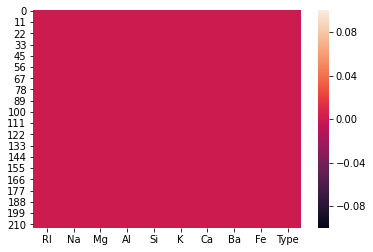

In [4]:
sns.heatmap(df.isnull())

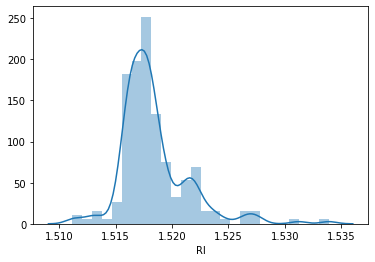

In [5]:
sns.distplot(df.RI)

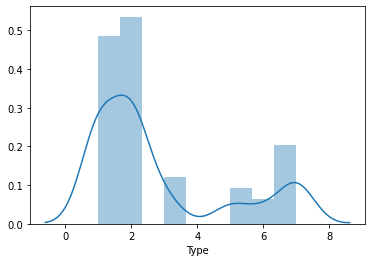

In [6]:
sns.distplot(df.Type)

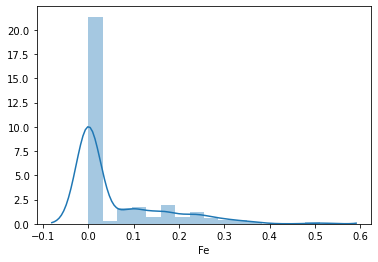

In [7]:
sns.distplot(df.Fe)

In [8]:
df = df.drop('Fe', axis=1)

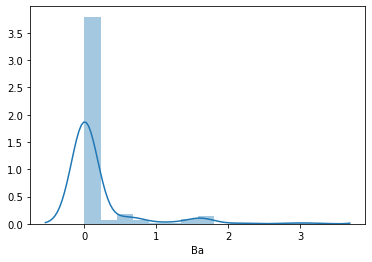

In [9]:
sns.distplot(df.Ba)

In [10]:
df = df.drop('Ba',axis=1)

In [11]:
from sklearn.ensemble import IsolationForest

In [12]:
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df)

IsolationForest(contamination=0.01, random_state=10)

In [13]:
y_pred_outliers = clf.predict(df)

In [14]:
df['anomaly']=clf.predict(df)

In [15]:
df[df['anomaly']==-1].index.tolist()

[106, 163, 184]

In [16]:
for i in df[df['anomaly']==-1].index.tolist():
    df.drop(i,axis=0,inplace=True)       

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaler.fit(df.drop('Type',axis=1))

StandardScaler()

In [19]:
sf = scaler.transform(df.drop('Type',axis=1))

In [20]:
df_scale = pd.DataFrame(sf,columns=df.columns[:-1])

### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df_scale
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
pred = knn.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print('with K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('Accuracy: ',np.mean(y_test==pred))

with K=3


[[14  4  3  0  0  0]
 [ 3 24  1  1  0  0]
 [ 1  2  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  1  0  0  2  0]
 [ 1  1  0  1  1  7]]
              precision    recall  f1-score   support

           1       0.74      0.67      0.70        21
           2       0.75      0.83      0.79        29
           3       0.33      0.40      0.36         5
           5       0.33      1.00      0.50         1
           6       0.67      0.67      0.67         3
           7       1.00      0.64      0.78        11

    accuracy                           0.71        70
   macro avg       0.64      0.70      0.63        70
weighted avg       0.75      0.71      0.72        70

Accuracy:  0.7142857142857143
